## Equidistribution of Coleman integrals

In [1]:
using AbstractAlgebra, Nemo
R,x= PolynomialRing(PadicField(853,2),"x")
a = (4*x^5 + x^4 + 256*x^3 + 192*x^2 + 48*x + 4)
d = derivative(a)
resultant(a,d)

┌ Info: Precompiling AbstractAlgebra [c3fe647b-3220-5bb0-a1ea-a7954cac585d]
└ @ Base loading.jl:1260
┌ Info: Precompiling Nemo [2edaba10-b0f1-5616-af89-8c11ac63239a]
└ @ Base loading.jl:1260



Welcome to Nemo version 0.22.0

Nemo comes with absolutely no warranty whatsoever



O(853^2)

In [8]:
using Coleman, Plots, Nemo, AbstractAlgebra, Hecke

┌ Info: Precompiling Coleman [18c793ea-2cd8-11e9-298f-8de9fd461f0e]
└ @ Base loading.jl:1260
  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **




Welcome to 

    _    _           _
   | |  | |         | |
   | |__| | ___  ___| | _____
   |  __  |/ _ \/ __| |/ / _ \
   | |  | |  __/ (__|   <  __/
   |_|  |_|\___|\___|_|\_\___|
    
Version 0.10.1 ... 
 ... which comes with absolutely no warranty whatsoever
(c) 2015-2021 by Claus Fieker, Tommy Hofmann and Carlo Sircana



┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


In [9]:
set_printing_mode(FlintPadicField, :val_unit)
N = 2

2

$$ P \in X (\mathbf Q)$$
genus 2 rank 1
$$ a = \int_P^\infty \omega_1,\, b = \int_P^\infty \omega_2 \in \mathbf Q_p \smallsetminus \mathbf Q$$
$$ a / b  \in \mathbf Q$$ 
for some CM curves, $a/b$ independent of $p$.

Annihilating differential lies in $H^0(X/\mathbf Q, \Omega^1) \subset H^0(X /\mathbf Q_p, \Omega^1)$, includes $p = \infty$.

In [10]:
function equidistdata(f; P = nothing, badp = [], pbound = 1000, a = 2, mod = 1, val = 0)
    if P == nothing
        P = rand(rational_points(a, f, 20))
    end
    @assert verify_pt(a, f, P)
    print("using P = ")
    println(P)
    data = []
    data2 = []
    RI = RegularIndices(a, f)
    for p in PrimesSet((2*N-1)*degree(f), pbound, mod, val)
        if p in badp
            continue
        end
        K = PadicField(p,N)
        #R,x = PolynomialRing(K,"x")
        h = change_base_ring(K, f)
        PK = map(K,P)
        #println(p)
        try
            ints = ColemanIntegrals(a, h, N, p, 1, PK, :inf)
            card = numerator(ZetaFunction(a, change_base_ring(Nemo.GF(p), f)))(1)
            C = tuple(map(t -> Float64((lift((card*t)//K(p))) % p)/p, (ints[i,1] for i in RI))...)
            push!(data, C)
        catch e
            println(e)
            println(parent(h))
            println(typeof(h))
            println(h)
            println(discriminant(h))
            println(valuation(discriminant(h)))
            println(p)
        end
    end
    return data
end
R,x = PolynomialRing(Nemo.QQ,"x")

(Univariate Polynomial Ring in x over Rational Field, x)

In [4]:
ZZ = Nemo.ZZ

Integer Ring

In [12]:
h =  4x^5 - 8x^4 + 8x^3 - 4x^2 + 1 # 997.b.997.1
edata = equidistdata(h, P = (0, -1), badp=[ZZ(997)],pbound=300)

using P = (0, -1)
MethodError(Hecke.leading_coefficient, ((20*17^0 + O(17^2))*x^4 + (257*17^0 + O(17^2))*x^3 + (24*17^0 + O(17^2))*x^2 + (281*17^0 + O(17^2))*x,), 0x0000000000006a4e)
Univariate Polynomial Ring in x over Field of 17-adic numbers
AbstractAlgebra.Generic.Poly{padic}
(4*17^0 + O(17^2))*x^5 + (281*17^0 + O(17^2))*x^4 + (8*17^0 + O(17^2))*x^3 + (285*17^0 + O(17^2))*x^2 + 1


MethodError: [91mMethodError: no method matching leading_coefficient(::AbstractAlgebra.Generic.Poly{padic})[39m
[91m[0mClosest candidates are:[39m
[91m[0m  leading_coefficient([91m::Hecke.PseudoPoly[39m) at /home/alex/.julia/packages/Hecke/LX7Ju/src/Misc/PseudoPolynomial.jl:26[39m
[91m[0m  leading_coefficient([91m::AbstractAlgebra.Generic.MPoly[39m) at /home/alex/.julia/packages/Hecke/LX7Ju/src/Misc/PseudoPolynomial.jl:303[39m

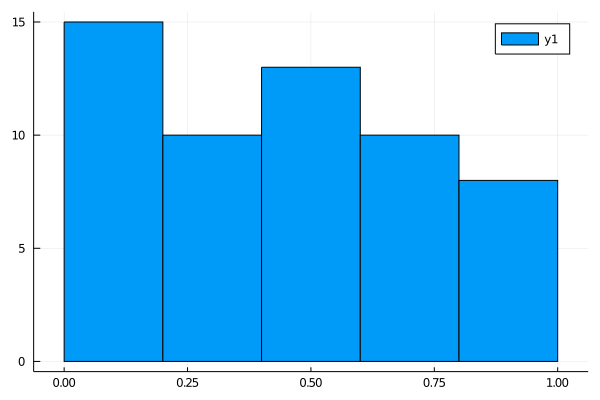

In [83]:
histogram(collect(collect(zip(edata...))[1]))

In [94]:
edata997 = equidistdata(4x^5 - 8x^4 + 8x^3 - 4x^2 + 1, P = (0, -1), pbound=10000, badp=[ZZ(997)]) # 997.b.997.1

using P = (0, -1)


1222-element Array{Any,1}:
 (0.5294117647058824, 0.0)
 (0.0, 0.5789473684210527)
 (0.6521739130434783, 0.17391304347826086)
 (0.0, 0.20689655172413793)
 (0.06451612903225806, 0.25806451612903225)
 (0.0, 0.0)
 (0.6829268292682927, 0.36585365853658536)
 (0.9302325581395349, 0.32558139534883723)
 (0.40425531914893614, 0.7659574468085106)
 (0.9245283018867925, 0.11320754716981132)
 (0.2033898305084746, 0.6271186440677966)
 (0.6065573770491803, 0.14754098360655737)
 (0.11940298507462686, 0.9701492537313433)
 ⋮
 (0.42244959983790903, 0.27565596190862124)
 (0.7599919052919154, 0.2666194475361732)
 (0.45443511682006676, 0.5407100232628704)
 (0.41036258963741035, 0.37157862842137157)
 (0.2398304229332795, 0.7245382053093772)
 (0.8308979139373174, 0.12596996875944774)
 (0.8116628059220465, 0.0664719508510424)
 (0.583022857718256, 0.19061524519182357)
 (0.9546323307514335, 0.9868222512825672)
 (0.15488993868730525, 0.809830133681777)
 (0.06411156817497743, 0.6537573994180796)
 (0.8175072696279956, 0.4238443798255289)

In [95]:
edata997

1222-element Array{Any,1}:
 (0.5294117647058824, 0.0)
 (0.0, 0.5789473684210527)
 (0.6521739130434783, 0.17391304347826086)
 (0.0, 0.20689655172413793)
 (0.06451612903225806, 0.25806451612903225)
 (0.0, 0.0)
 (0.6829268292682927, 0.36585365853658536)
 (0.9302325581395349, 0.32558139534883723)
 (0.40425531914893614, 0.7659574468085106)
 (0.9245283018867925, 0.11320754716981132)
 (0.2033898305084746, 0.6271186440677966)
 (0.6065573770491803, 0.14754098360655737)
 (0.11940298507462686, 0.9701492537313433)
 ⋮
 (0.42244959983790903, 0.27565596190862124)
 (0.7599919052919154, 0.2666194475361732)
 (0.45443511682006676, 0.5407100232628704)
 (0.41036258963741035, 0.37157862842137157)
 (0.2398304229332795, 0.7245382053093772)
 (0.8308979139373174, 0.12596996875944774)
 (0.8116628059220465, 0.0664719508510424)
 (0.583022857718256, 0.19061524519182357)
 (0.9546323307514335, 0.9868222512825672)
 (0.15488993868730525, 0.809830133681777)
 (0.06411156817497743, 0.6537573994180796)
 (0.8175072696279956, 0.4238443798255289)

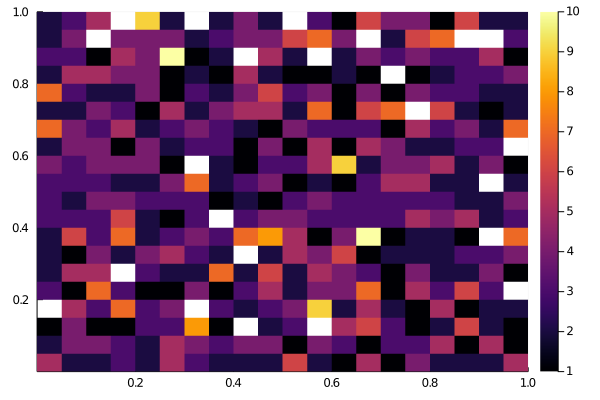

In [99]:
histogram2d(first.(edata997),last.(edata997),bins=30)

In [100]:
savefig(histogram2d(first.(edata997),last.(edata997),bins=30),"997")

In [7]:
edata2080 =  equidistdata(4*x^5 + x^4 + 256*x^3 + 192*x^2 + 48*x + 4, P= (0, 2), pbound=449) # 2080.a.4160.2 2, 5, 13

UndefVarError: [91mUndefVarError: verify_pt not defined[39m

In [161]:
Hecke.factor(discriminant(4*x^5 + x^4 + 256*x^3 + 192*x^2 + 48*x + 4),ZZ)

1 * 5 * 13 * 2^14

In [6]:
a = (change_base_ring( FlintPadicField(ZZ(853),2), 4*x^5 + x^4 + 256*x^3 + 192*x^2 + 48*x + 4))
d = derivative(a)
@which resultant(d,a)


resultant(a::PolyElem{T}, b::PolyElem{T}) where T<:Union{FieldElem, AbstractFloat, ResElem, Rational} in AbstractAlgebra.Generic at /home/alex/.julia/packages/AbstractAlgebra/6JkeN/src/generic/Poly.jl:2315

In [123]:
@edit discriminant(5*x^5 + x^4 + 256*x^3 + 192*x^2 + 48*x + 4)

>

Too many errors from stdin


ProcessFailedException: [91mfailed process: Process(`[4m/usr/bin/nano[24m [4m+2209[24m [4m/home/alex/.julia/packages/AbstractAlgebra/RnlKH/src/generic/Poly.jl[24m`, ProcessExited(1)) [1][39m


In [ ]:
226587

In [108]:
histogram2d(first.(edata2080),last.(edata2080),bins=50)
savefig(histogram2d(first.(edata2080),last.(edata2080),bins=50),"2080")

In [21]:
[a+2*b for (a,b) in edata2080]

UndefVarError: [91mUndefVarError: edata2080 not defined[39m

In [20]:
Hecke.factor(ZZ(2080))

1 * 5 * 13 * 2^5

In [106]:
edatakatz =  equidistdata(4*x^5 - 8*x + 1 , P= (0, 1), pbound=10000) 

using P = (0, 1)
InterruptException()

1222-element Array{Any,1}:
 (0.7058823529411765, 0.23529411764705882)
 (0.8421052631578947, 0.7894736842105263)
 (0.782608695652174, 0.17391304347826086)
 (0.1724137931034483, 0.034482758620689655)
 (0.25806451612903225, 0.6451612903225806)
 (0.8918918918918919, 0.3783783783783784)
 (0.7560975609756098, 0.14634146341463414)
 (0.9534883720930233, 0.813953488372093)
 (0.7021276595744681, 0.2553191489361702)
 (0.4528301886792453, 0.03773584905660377)
 (0.3050847457627119, 0.3559322033898305)
 (0.5245901639344263, 0.3114754098360656)
 (0.05970149253731343, 0.417910447761194)
 ⋮
 (0.450410292776821, 0.6681187316381318)
 (0.9169280582818982, 0.11808155418395225)
 (0.2750075857186204, 0.5267523010013149)
 (0.8758711241288759, 0.3836986163013837)
 (0.3627737963056425, 0.09044110225093369)
 (0.09392320870704424, 0.3191575128489368)
 (0.2113002316446772, 0.9402759593111089)
 (0.04984392306917732, 0.11378511730943511)
 (0.9464842571169902, 0.3874861683935218)
 (0.15318122424364258, 0.3322947029852246)
 (0.36229557539881607, 0.5725895455001505)
 (0.35104782913867444, 0.1933219693171563)

In [110]:
histogram2d(first.(edatakatz),last.(edatakatz),bins=40)
savefig(histogram2d(first.(edatakatz),last.(edatakatz),bins=40),"katz")

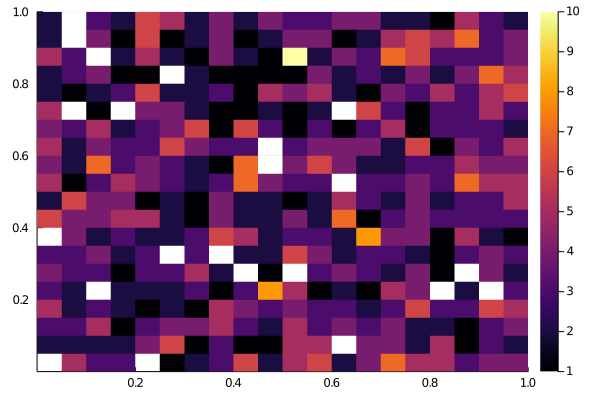

In [109]:

histogram2d(first.(edatakatz),last.(edatakatz),bins=40)

In [21]:
edatakatzcm =  equidistdata(4*x^5 + 5 , P= (-1, 1), pbound=10000) 

using P = (-1, 1)


1223-element Array{Any,1}:
 (0.7058823529411765, 0.8823529411764706)
 (0.7894736842105263, 0.7368421052631579)
 (0.4782608695652174, 0.7391304347826086)
 (0.10344827586206896, 0.4482758620689655)
 (0.41935483870967744, 0.4838709677419355)
 (0.5135135135135135, 0.1891891891891892)
 (0.8048780487804879, 0.0975609756097561)
 (0.3488372093023256, 0.4883720930232558)
 (0.5106382978723404, 0.723404255319149)
 (0.41509433962264153, 0.03773584905660377)
 (0.06779661016949153, 0.8305084745762712)
 (0.0, 0.0)
 (0.4925373134328358, 0.2835820895522388)
 ⋮
 (0.49559315165636714, 0.6438050856042954)
 (0.9054942831124153, 0.896691288070424)
 (0.7733387276221301, 0.7472438555679175)
 (0.6908393091606908, 0.6517523482476517)
 (0.8073079640658121, 0.0002018774603815484)
 (0.981759548523632, 0.851053108938829)
 (0.22509819720012086, 0.7475073018430859)
 (0.748464404390293, 0.18779579095760748)
 (0.26647218589679106, 0.5375716728699326)
 (0.7077093175193486, 0.30334707005729217)
 (0.14648339520417378, 0.8597371325373734)
 (0.9745312343326983, 0.32427554396871555)

In [29]:
edata18432=  equidistdata( x^5 - 2x^4 + 2x^3 + 2x^2 + x , P= (1, -2), pbound=10000)  #18432.c.589824.1

using P = (1, -2)
AssertionError("valuation(discriminant(h)) == 0")
Univariate Polynomial Ring in x over Field of 97-adic numbers
AbstractAlgebra.Generic.Poly{padic}
x^5 + (9407*97^0 + O(97^2))*x^4 + (2*97^0 + O(97^2))*x^3 + (2*97^0 + O(97^2))*x^2 + x
O(97^-1)
-1
97


1222-element Array{Any,1}:
 (0.5882352941176471, 0.35294117647058826)
 (0.7894736842105263, 0.15789473684210525)
 (0.0, 0.6086956521739131)
 (0.6206896551724138, 0.5862068965517241)
 (0.6774193548387096, 0.3870967741935484)
 (0.5945945945945946, 0.8648648648648649)
 (0.024390243902439025, 0.8536585365853658)
 (0.4418604651162791, 0.023255813953488372)
 (0.2978723404255319, 0.06382978723404255)
 (0.5849056603773585, 0.5849056603773585)
 (0.2542372881355932, 0.559322033898305)
 (0.5081967213114754, 0.3442622950819672)
 (0.07462686567164178, 0.5970149253731343)
 ⋮
 (0.1456792624860703, 0.38810657481511496)
 (0.8704846706465648, 0.653850045532733)
 (0.16546980883989076, 0.5714574694042682)
 (0.2692657307342693, 0.5312594687405312)
 (0.8900777228222468, 0.7160593519733521)
 (0.08062078000604656, 0.2533508011690013)
 (0.7954476785174741, 0.5659180179272837)
 (0.5505991340247709, 0.5956097069781492)
 (0.2048083693793381, 0.994165576903732)
 (0.8523469695446778, 0.2889737662076591)
 (0.7315139961874185, 0.697401424701515)
 (0.909254988468866, 0.4788930111300511)

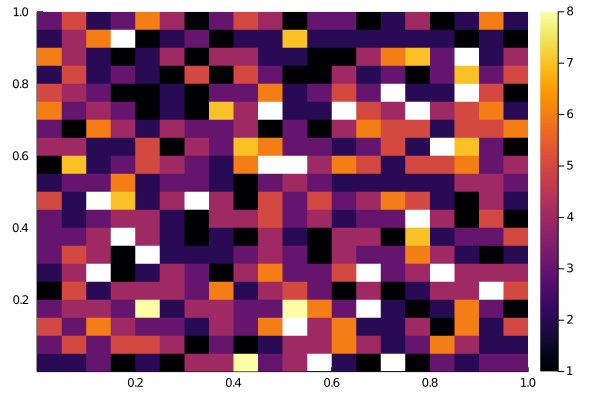

In [33]:
histogram2d(first.(edata18432),last.(edata18432),bins=20)
#savefig(histogram2d(first.(edatakatzcm),last.(edatakatzcm),bins=40),"katzcm")

In [10]:
histogram(edata)

MethodError: [91mMethodError: no method matching axes(::Tuple{Float64,Float64}, ::Int64)[39m
[91m[0mClosest candidates are:[39m
[91m[0m  axes([91m::Core.SimpleVector[39m, ::Integer) at essentials.jl:608[39m
[91m[0m  axes(::Tuple) at tuple.jl:23[39m
[91m[0m  axes([91m::Number[39m, ::Integer) at number.jl:65[39m
[91m[0m  ...[39m

In [17]:
histogram(equidistdata(8x^5 - 3x^4 - 18x^3 + x^2 + 12x + 4, (0, 2), pbound=2000)) # 2156.b.34496.1, 2, 7, 11

MethodError: [91mMethodError: no method matching equidistdata(::fmpq_poly, ::Tuple{Int64,Int64}; pbound=2000)[39m
[91m[0mClosest candidates are:[39m
[91m[0m  equidistdata(::Any; P, badp, pbound, a, mod, val) at In[5]:2[39m

In [18]:
edata = equidistdata(8x^5 - 3x^4 - 18x^3 + x^2 + 12x + 4, (0, 2), pbound=10000) # 2156.b.34496.1, 2, 7, 11

MethodError: [91mMethodError: no method matching equidistdata(::fmpq_poly, ::Tuple{Int64,Int64}; pbound=10000)[39m
[91m[0mClosest candidates are:[39m
[91m[0m  equidistdata(::Any; P, badp, pbound, a, mod, val) at In[5]:2[39m

In [19]:
histogram2d(edata,bins=23) # 2156.b.34496.1, 2, 7, 11

MethodError: [91mMethodError: no method matching axes(::Tuple{Float64,Float64}, ::Int64)[39m
[91m[0mClosest candidates are:[39m
[91m[0m  axes([91m::Core.SimpleVector[39m, ::Integer) at essentials.jl:608[39m
[91m[0m  axes(::Tuple) at tuple.jl:23[39m
[91m[0m  axes([91m::Number[39m, ::Integer) at number.jl:65[39m
[91m[0m  ...[39m

In [20]:
[2*a+b for (a,b) in zip(edata[1], edata[2])]

2-element Array{Float64,1}:
 1.7647058823529411
 0.8421052631578947

In [21]:
edata2624 = equidistdata(4*x^5 - 95*x^4 + 16*x^3 + 42*x^2 + 12*x + 1, (0, -1), pbound=10000, badp=[ZZ(2), ZZ(41)]) #  2624.a.2624.2

MethodError: [91mMethodError: no method matching equidistdata(::fmpq_poly, ::Tuple{Int64,Int64}; pbound=10000, badp=fmpz[2, 41])[39m
[91m[0mClosest candidates are:[39m
[91m[0m  equidistdata(::Any; P, badp, pbound, a, mod, val) at In[5]:2[39m

In [22]:
histogram2d(edata2624,bins=23) # 2624

UndefVarError: [91mUndefVarError: edata2624 not defined[39m

In [23]:
[a+2*b for (a,b) in zip(edata2624[1], edata2624[2])]

UndefVarError: [91mUndefVarError: edata2624 not defined[39m

In [24]:
edata32624 = equidistdata(4*x^5 - 95*x^4 + 16*x^3 + 42*x^2 + 12*x + 1, (0, 1), pbound=3000, a=3, badp=[ZZ(2), ZZ(41)]) #  2624.a.2624.2

MethodError: [91mMethodError: no method matching equidistdata(::fmpq_poly, ::Tuple{Int64,Int64}; pbound=3000, a=3, badp=fmpz[2, 41])[39m
[91m[0mClosest candidates are:[39m
[91m[0m  equidistdata(::Any; P, badp, pbound, a, mod, val) at In[5]:2[39m

In [25]:
histogram2d(edata32624,bins=23) # 2624

UndefVarError: [91mUndefVarError: edata32624 not defined[39m

In [26]:
[a for (a,b) in zip(edata32624[1], edata32624[2])]

UndefVarError: [91mUndefVarError: edata32624 not defined[39m

In [27]:
edata102400 = equidistdata(x^5 - x^3 - x, (-1, -1), pbound=30000, a=2, badp=[ZZ(2), ZZ(5)]) # 102400.b.102400.1

MethodError: [91mMethodError: no method matching equidistdata(::fmpq_poly, ::Tuple{Int64,Int64}; pbound=30000, a=2, badp=fmpz[2, 5])[39m
[91m[0mClosest candidates are:[39m
[91m[0m  equidistdata(::Any; P, badp, pbound, a, mod, val) at In[5]:2[39m

In [28]:
histogram2d(edata102400,bins=49) # 2624

UndefVarError: [91mUndefVarError: edata102400 not defined[39m

In [29]:
length(edata102400[1])

UndefVarError: [91mUndefVarError: edata102400 not defined[39m

In [30]:
collect(zip(edata102400[1],edata102400[2]))[1:10]

UndefVarError: [91mUndefVarError: edata102400 not defined[39m

In [31]:
collect(zip((Float64(1),Float64(2),Float64(3)),(1,2,3)))

3-element Array{Tuple{Float64,Int64},1}:
 (1.0, 1)
 (2.0, 2)
 (3.0, 3)

In [32]:
edata1024002 = equidistdata(x^5 - x^3 - x, (-1, -1), pbound=300, a=2, badp=[ZZ(2), ZZ(5)]) # 102400.b.102400.1

MethodError: [91mMethodError: no method matching equidistdata(::fmpq_poly, ::Tuple{Int64,Int64}; pbound=300, a=2, badp=fmpz[2, 5])[39m
[91m[0mClosest candidates are:[39m
[91m[0m  equidistdata(::Any; P, badp, pbound, a, mod, val) at In[5]:2[39m

In [33]:
edata = equidistdata(x^5 - x^3 - x + 1, pbound=200, a=2, badp=[ZZ(2), ZZ(5)]) # 102400.b.102400.1

using P = (0, -1)


40-element Array{Any,1}:
 (0.8235294117647058, 0.23529411764705882)
 (0.47368421052631576, 0.631578947368421)
 (0.5652173913043478, 0.9565217391304348)
 (0.06896551724137931, 0.5862068965517241)
 (0.16129032258064516, 0.3225806451612903)
 (0.1891891891891892, 0.6756756756756757)
 (0.9024390243902439, 0.34146341463414637)
 (0.7209302325581395, 0.5813953488372093)
 (0.8085106382978723, 0.3617021276595745)
 (0.2641509433962264, 0.09433962264150944)
 (0.9661016949152542, 0.7288135593220338)
 (0.5737704918032787, 0.14754098360655737)
 (0.6716417910447762, 0.746268656716418)
 ⋮
 (0.7718120805369127, 0.06040268456375839)
 (0.3841059602649007, 0.7748344370860927)
 (0.4585987261146497, 0.8726114649681529)
 (0.3987730061349693, 0.7914110429447853)
 (0.017964071856287425, 0.1317365269461078)
 (0.6127167630057804, 0.07514450867052024)
 (0.37988826815642457, 0.5195530726256983)
 (0.4198895027624309, 0.30386740331491713)
 (0.675392670157068, 0.5392670157068062)
 (0.32642487046632124, 0.40932642487046633)
 (0.4873096446700508, 0.8781725888324873)
 (0.6582914572864321, 0.36180904522613067)

In [34]:
histogram2d(edata,bins=12)

MethodError: [91mMethodError: no method matching axes(::Tuple{Float64,Float64}, ::Int64)[39m
[91m[0mClosest candidates are:[39m
[91m[0m  axes([91m::Core.SimpleVector[39m, ::Integer) at essentials.jl:608[39m
[91m[0m  axes(::Tuple) at tuple.jl:23[39m
[91m[0m  axes([91m::Number[39m, ::Integer) at number.jl:65[39m
[91m[0m  ...[39m

In [35]:
edata = equidistdata(4*x^4 + 16*x^3 + 42*x^2 + 12*x + 1, pbound=200, a=3, badp=[ZZ(2), ZZ(5)])

using P = (0, 1)
Exception (padic_get_fmpz).  Negative valuation.


36-element Array{Any,1}:
 (0.6086956521739131, 0.17391304347826086, 0.34782608695652173)
 (0.20689655172413793, 0.4482758620689655, 0.06896551724137931)
 (0.8378378378378378, 0.5135135135135135, 0.7567567567567568)
 (0.6585365853658537, 0.6341463414634146, 0.7560975609756098)
 (0.6511627906976745, 0.7209302325581395, 0.23255813953488372)
 (0.0, 0.39622641509433965, 0.9622641509433962)
 (0.3728813559322034, 0.559322033898305, 0.7627118644067796)
 (0.3114754098360656, 0.5573770491803278, 0.9836065573770492)
 (0.582089552238806, 0.8955223880597015, 0.43283582089552236)
 (0.9859154929577465, 0.19718309859154928, 0.08450704225352113)
 (0.726027397260274, 0.410958904109589, 0.6986301369863014)
 (0.35443037974683544, 0.17721518987341772, 0.26582278481012656)
 (0.0, 0.08433734939759036, 0.25301204819277107)
 ⋮
 (0.5973154362416108, 0.6778523489932886, 0.5369127516778524)
 (0.23178807947019867, 0.5033112582781457, 0.3509933774834437)
 (0.6050955414012739, 0.5031847133757962, 0.9745222929936306)
 (0.26993865030674846, 0.6073619631901841, 0.22085889570552147)
 (0.281437125748503, 0.9041916167664671, 0.4251497005988024)
 (0.9248554913294798, 0.6242774566473989, 0.5202312138728323)
 (0.4134078212290503, 0.7597765363128491, 0.6927374301675978)
 (0.23756906077348067, 0.26519337016574585, 0.861878453038674)
 (0.6492146596858639, 0.17801047120418848, 0.225130890052356)
 (0.8704663212435233, 0.07772020725388601, 0.0051813471502590676)
 (0.5786802030456852, 0.8020304568527918, 0.09644670050761421)
 (0.5879396984924623, 0.6482412060301508, 0.2964824120603015)

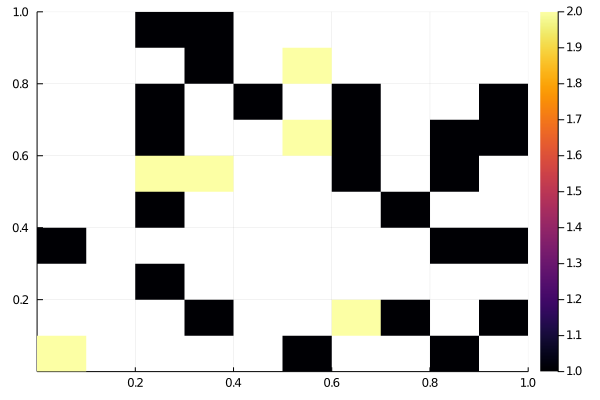

In [36]:
histogram2d(collect(collect(zip(edata...))[1]),collect(collect(zip(edata...))[2]),bins=12)

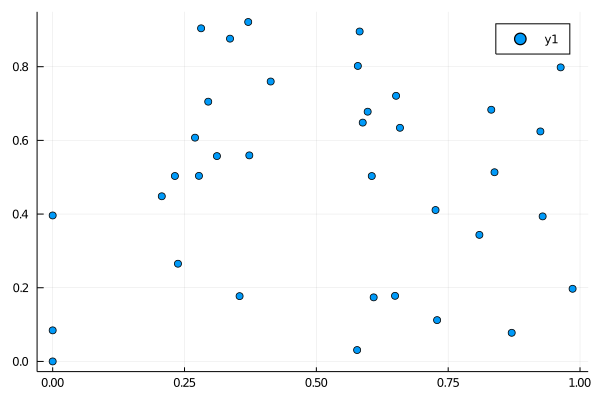

In [37]:
scatter(collect(collect(zip(edata...))[1]),collect(collect(zip(edata...))[2]))

In [38]:
using AbstractPlotting, WGLMakie
scatter(collect(collect(zip(edata...))[1]),collect(collect(zip(edata...))[2]),collect(collect(zip(edata...))[3]))

ArgumentError: [91mArgumentError: Package AbstractPlotting not found in current path:[39m
[91m- Run `import Pkg; Pkg.add("AbstractPlotting")` to install the AbstractPlotting package.[39m


In [39]:
using AbstractPlotting

ArgumentError: [91mArgumentError: Package AbstractPlotting not found in current path:[39m
[91m- Run `import Pkg; Pkg.add("AbstractPlotting")` to install the AbstractPlotting package.[39m


In [40]:
meshscatter(collect(collect(zip(edata...))[1]),collect(collect(zip(edata...))[2]),collect(collect(zip(edata...))[3]), color = RGBAf0(0.9, 0.2, 0.4, 1), markersize = 0.05)

UndefVarError: [91mUndefVarError: RGBAf0 not defined[39m

In [41]:
edata

36-element Array{Any,1}:
 (0.6086956521739131, 0.17391304347826086, 0.34782608695652173)
 (0.20689655172413793, 0.4482758620689655, 0.06896551724137931)
 (0.8378378378378378, 0.5135135135135135, 0.7567567567567568)
 (0.6585365853658537, 0.6341463414634146, 0.7560975609756098)
 (0.6511627906976745, 0.7209302325581395, 0.23255813953488372)
 (0.0, 0.39622641509433965, 0.9622641509433962)
 (0.3728813559322034, 0.559322033898305, 0.7627118644067796)
 (0.3114754098360656, 0.5573770491803278, 0.9836065573770492)
 (0.582089552238806, 0.8955223880597015, 0.43283582089552236)
 (0.9859154929577465, 0.19718309859154928, 0.08450704225352113)
 (0.726027397260274, 0.410958904109589, 0.6986301369863014)
 (0.35443037974683544, 0.17721518987341772, 0.26582278481012656)
 (0.0, 0.08433734939759036, 0.25301204819277107)
 ⋮
 (0.5973154362416108, 0.6778523489932886, 0.5369127516778524)
 (0.23178807947019867, 0.5033112582781457, 0.3509933774834437)
 (0.6050955414012739, 0.5031847133757962, 0.9745222929936306)
 (0.26993865030674846, 0.6073619631901841, 0.22085889570552147)
 (0.281437125748503, 0.9041916167664671, 0.4251497005988024)
 (0.9248554913294798, 0.6242774566473989, 0.5202312138728323)
 (0.4134078212290503, 0.7597765363128491, 0.6927374301675978)
 (0.23756906077348067, 0.26519337016574585, 0.861878453038674)
 (0.6492146596858639, 0.17801047120418848, 0.225130890052356)
 (0.8704663212435233, 0.07772020725388601, 0.0051813471502590676)
 (0.5786802030456852, 0.8020304568527918, 0.09644670050761421)
 (0.5879396984924623, 0.6482412060301508, 0.2964824120603015)

In [42]:

WGLMakie.scatter(collect(collect(zip(edata...))[1]),collect(collect(zip(edata...))[2]),collect(collect(zip(edata...))[3]))

UndefVarError: [91mUndefVarError: WGLMakie not defined[39m

Does the relationship $\theta_1 + 2\theta_2 = 0$ hold on any higher level for a CM curve?

In [43]:
function padicdata(f; P = nothing, badp = [], pbound = 1000, a = 2)
    if P == nothing
        P = rand(rational_points(a, f, 20))
    end
    @assert verify_pt(a, f, P)
    data = []
    data2 = []
    RI = RegularIndices(a, f)
    print(RI)
    for p in PrimesSet((2*N-1)*degree(f), pbound)
        if p in badp
            continue
        end
        K = PadicField(p,N)
        #R,x = PolynomialRing(K,"x")
        h = change_base_ring(K, f)
        PK = map(x->K(x),P)
        #println(p)
        try
            ints = ColemanIntegrals(a, h, N, p, 1, PK, :inf)
            C = tuple(map(t -> Float64(lift(t//K(p)))/p, (ints[i,1] for i in RI))...)
            push!(data, C)
            D = tuple((ints[i,1] for i in RI)...)
            push!(data2, D)
        catch e
        end
    end
    return data, data2
end
data,data2 = padicdata(4*x^5 + x^4 + 256*x^3 + 192*x^2 + 48*x + 4, P= (0, 2), pbound=200) # 2080.a.4160.2 2, 5, 13

[1, 2]

(Any[(0.9411764705882353, 0.5294117647058824), (0.8947368421052632, 0.05263157894736842), (0.13043478260869565, 0.43478260869565216), (0.1724137931034483, 0.41379310344827586), (0.8709677419354839, 0.06451612903225806), (0.5135135135135135, 0.24324324324324326), (0.0975609756097561, 0.9512195121951219), (0.20930232558139536, 0.3953488372093023), (0.0851063829787234, 0.9574468085106383), (0.6037735849056604, 0.6981132075471698)  …  (0.2611464968152866, 0.36942675159235666), (0.3619631901840491, 0.31901840490797545), (0.9281437125748503, 0.03592814371257485), (0.3236994219653179, 0.838150289017341), (0.8212290502793296, 0.0893854748603352), (0.011049723756906077, 0.994475138121547), (0.07329842931937172, 0.9633507853403142), (0.7357512953367875, 0.6321243523316062), (0.29949238578680204, 0.350253807106599), (0.8542713567839196, 0.5728643216080402)], Any[(16*17^1 + O(17^2), 9*17^1 + O(17^2)), (17*19^1 + O(19^2), 19^1 + O(19^2)), (3*23^1 + O(23^2), 10*23^1 + O(23^2)), (5*29^1 + O(29^2), 12*29^1 + O(29^2)), (27*31^1 + O(31^2), 2*31^1 + O(31^2)), (19*37^1 + O(37^2), 9*37^1 + O(37^2)), (4*41^1 + O(41^2), 39*41^1 + O(41^2)), (9*43^1 + O(43^2), 17*43^1 + O(43^2)), (4*47^1 + O(47^2), 45*47^1 + O(47^2)), (32*53^1 + O(53^2), 37*53^1 + O(53^2))  …  (41*157^1 + O(157^2), 58*157^1 + O(157^2)), (59*163^1 + O(163^2), 52*163^1 + O(163^2)), (155*167^1 + O(167^2), 6*167^1 + O(167^2)), (56*173^1 + O(173^2), 145*173^1 + O(173^2)), (147*179^1 + O(179^2), 16*179^1 + O(179^2)), (2*181^1 + O(181^2), 180*181^1 + O(181^2)), (14*191^1 + O(191^2), 184*191^1 + O(191^2)), (142*193^1 + O(193^2), 122*193^1 + O(193^2)), (59*197^1 + O(197^2), 69*197^1 + O(197^2)), (170*199^1 + O(199^2), 114*199^1 + O(199^2))])

In [44]:
[a + 2*b for (a,b) in data2]

40-element Array{padic,1}:
 O(17^2)
 O(19^2)
 O(23^2)
 O(29^2)
 O(31^2)
 O(37^2)
 O(41^2)
 O(43^2)
 O(47^2)
 O(53^2)
 O(59^2)
 O(61^2)
 O(67^2)
 ⋮
 O(149^2)
 O(151^2)
 O(157^2)
 O(163^2)
 O(167^2)
 O(173^2)
 O(179^2)
 O(181^2)
 O(191^2)
 O(193^2)
 O(197^2)
 O(199^2)

In [45]:
data,data2 = padicdata(8x^5 - 3x^4 - 18x^3 + x^2 + 12x + 4, P =(0, 2), pbound=100) # 2156.b.34496.1, 2, 7, 11

[1, 2]

(Any[(0.7647058823529411, 0.47058823529411764), (0.2631578947368421, 0.47368421052631576), (0.43478260869565216, 0.13043478260869565), (0.034482758620689655, 0.9310344827586207), (0.9032258064516129, 0.1935483870967742), (0.05405405405405406, 0.8918918918918919), (0.7209302325581395, 0.5581395348837209), (0.02127659574468085, 0.9574468085106383), (0.5660377358490566, 0.8679245283018868), (0.3728813559322034, 0.2542372881355932), (0.36065573770491804, 0.2786885245901639), (0.8059701492537313, 0.3880597014925373), (0.39436619718309857, 0.2112676056338028), (0.0684931506849315, 0.863013698630137), (0.02531645569620253, 0.9493670886075949), (0.27710843373493976, 0.4457831325301205), (0.8426966292134831, 0.3146067415730337), (0.5670103092783505, 0.865979381443299)], Any[(13*17^1 + O(17^2), 8*17^1 + O(17^2)), (5*19^1 + O(19^2), 9*19^1 + O(19^2)), (10*23^1 + O(23^2), 3*23^1 + O(23^2)), (29^1 + O(29^2), 27*29^1 + O(29^2)), (28*31^1 + O(31^2), 6*31^1 + O(31^2)), (2*37^1 + O(37^2), 33*37^1 + O(37^2)), (31*43^1 + O(43^2), 24*43^1 + O(43^2)), (47^1 + O(47^2), 45*47^1 + O(47^2)), (30*53^1 + O(53^2), 46*53^1 + O(53^2)), (22*59^1 + O(59^2), 15*59^1 + O(59^2)), (22*61^1 + O(61^2), 17*61^1 + O(61^2)), (54*67^1 + O(67^2), 26*67^1 + O(67^2)), (28*71^1 + O(71^2), 15*71^1 + O(71^2)), (5*73^1 + O(73^2), 63*73^1 + O(73^2)), (2*79^1 + O(79^2), 75*79^1 + O(79^2)), (23*83^1 + O(83^2), 37*83^1 + O(83^2)), (75*89^1 + O(89^2), 28*89^1 + O(89^2)), (55*97^1 + O(97^2), 84*97^1 + O(97^2))])

In [46]:

[2*a + b for (a,b) in data2]

18-element Array{padic,1}:
 O(17^2)
 O(19^2)
 O(23^2)
 O(29^2)
 O(31^2)
 O(37^2)
 O(43^2)
 O(47^2)
 O(53^2)
 O(59^2)
 O(61^2)
 O(67^2)
 O(71^2)
 O(73^2)
 O(79^2)
 O(83^2)
 O(89^2)
 O(97^2)

Questions
---

1. When does this occur, what properties of CM (base field, RM ?) need to be satisfied, does the base point need to be rational.
2. Is this useful? Does knowing the annihilating differential ahead of time help you?
3. What is the analogue for QC ? Will the functions $\theta$ occuring there be "independent of $p$" in the bielliptic case?

### Sachi's example

In [47]:
edata = equidistdata(x^4+6*x^3+7*x^2-6*x, pbound=200, a=3, badp=[ZZ(2), ZZ(3), ZZ(17)])

using P = (1, 2)


38-element Array{Any,1}:
 (0.782608695652174, 0.08695652173913043, 0.8695652173913043)
 (0.896551724137931, 0.7586206896551724, 0.8620689655172413)
 (0.6451612903225806, 0.9032258064516129, 0.6451612903225806)
 (0.972972972972973, 0.05405405405405406, 0.918918918918919)
 (0.3902439024390244, 0.2682926829268293, 0.0975609756097561)
 (0.046511627906976744, 0.3488372093023256, 0.9767441860465116)
 (0.14893617021276595, 0.9361702127659575, 0.5957446808510638)
 (0.6037735849056604, 0.05660377358490566, 0.41509433962264153)
 (0.711864406779661, 0.559322033898305, 0.6610169491525424)
 (0.5573770491803278, 0.0, 0.0)
 (0.04477611940298507, 0.19402985074626866, 0.208955223880597)
 (0.8591549295774648, 0.5211267605633803, 0.7183098591549296)
 (0.8082191780821918, 0.8356164383561644, 0.2465753424657534)
 ⋮
 (0.2483221476510067, 0.1610738255033557, 0.7583892617449665)
 (0.8344370860927153, 0.7086092715231788, 0.4370860927152318)
 (0.10191082802547771, 0.8407643312101911, 0.7388535031847133)
 (0.6073619631901841, 0.9141104294478528, 0.12883435582822086)
 (0.6407185628742516, 0.7964071856287425, 0.30538922155688625)
 (0.6358381502890174, 0.8728323699421965, 0.1907514450867052)
 (0.5865921787709497, 0.12849162011173185, 0.30726256983240224)
 (0.9558011049723757, 0.7624309392265194, 0.856353591160221)
 (0.6073298429319371, 0.2198952879581152, 0.6701570680628273)
 (0.12435233160621761, 0.694300518134715, 0.9585492227979274)
 (0.22842639593908629, 0.1319796954314721, 0.8020304568527918)
 (0.37185929648241206, 0.33668341708542715, 0.9949748743718593)

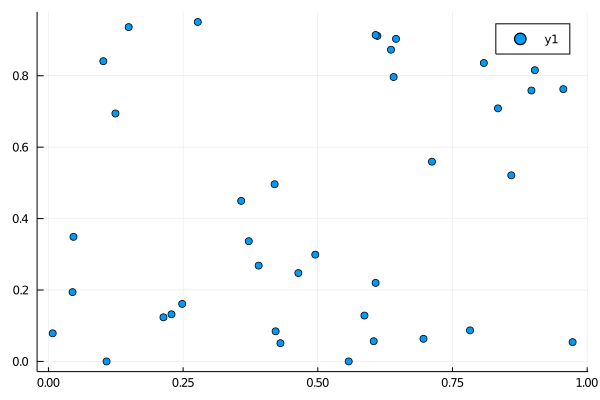

In [48]:
scatter(collect(collect(zip(edata...))[1]),collect(collect(zip(edata...))[2]))

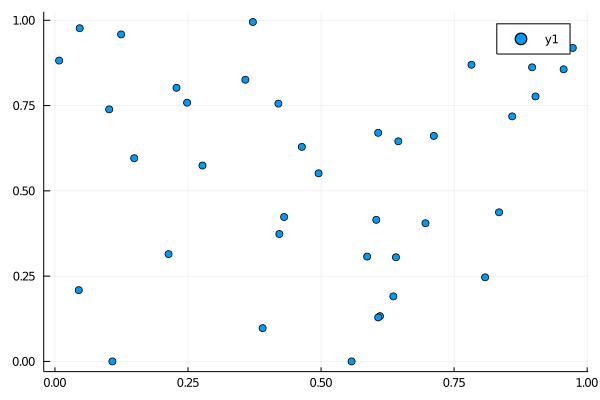

In [49]:
scatter(collect(collect(zip(edata...))[1]),collect(collect(zip(edata...))[3]))

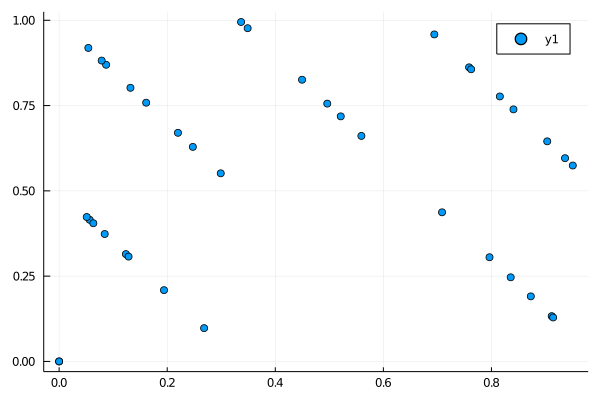

In [50]:
scatter(collect(collect(zip(edata...))[2]),collect(collect(zip(edata...))[3]))

In [51]:
[3*b + 2*c for (a,b,c) in edata]

38-element Array{Float64,1}:
 2.0
 3.9999999999999996
 4.0
 2.0
 1.0
 3.0
 4.0
 1.0
 3.0
 0.0
 1.0
 3.0
 3.0
 ⋮
 2.0
 3.0
 4.0
 3.0
 3.0
 2.9999999999999996
 1.0
 4.0
 2.0
 4.0
 2.0
 3.0

In [52]:
edata = equidistdata(2*x^4+4*x^3-x^2-3*x + 1, pbound=200, a=3, badp=[ZZ(2), ZZ(3), ZZ(17)])

using P = (-1, 1)
Exception (padic_get_fmpz).  Negative valuation.
Exception (padic_get_fmpz).  Negative valuation.


36-element Array{Any,1}:
 (0.7391304347826086, 0.08695652173913043, 0.9565217391304348)
 (0.8275862068965517, 0.8275862068965517, 0.5862068965517241)
 (0.0, 0.7096774193548387, 0.6451612903225806)
 (0.17073170731707318, 0.8292682926829268, 0.5853658536585366)
 (0.4186046511627907, 0.27906976744186046, 0.8604651162790697)
 (0.8085106382978723, 0.8936170212765957, 0.5531914893617021)
 (0.8490566037735849, 0.9433962264150944, 0.5283018867924528)
 (0.11864406779661017, 0.0847457627118644, 0.4576271186440678)
 (0.4098360655737705, 0.5409836065573771, 0.22950819672131148)
 (0.1044776119402985, 0.40298507462686567, 0.29850746268656714)
 (0.726027397260274, 0.3150684931506849, 0.3424657534246575)
 (0.13924050632911392, 0.5443037974683544, 0.22784810126582278)
 (0.8795180722891566, 0.3614457831325301, 0.8192771084337349)
 ⋮
 (0.8389261744966443, 0.6644295302013423, 0.16778523489932887)
 (0.6423841059602649, 0.5894039735099338, 0.2052980132450331)
 (0.910828025477707, 0.6369426751592356, 0.6815286624203821)
 (0.0736196319018405, 0.5153374233128835, 0.7423312883435583)
 (0.4311377245508982, 0.09580838323353294, 0.9520958083832335)
 (0.791907514450867, 0.11560693641618497, 0.9421965317919075)
 (0.7318435754189944, 0.888268156424581, 0.055865921787709494)
 (0.20994475138121546, 0.4696132596685083, 0.26519337016574585)
 (0.6858638743455497, 0.3507853403141361, 0.32460732984293195)
 (0.6735751295336787, 0.8393782383419689, 0.5803108808290155)
 (0.116751269035533, 0.15736040609137056, 0.4213197969543147)
 (0.21608040201005024, 0.5728643216080402, 0.7135678391959799)

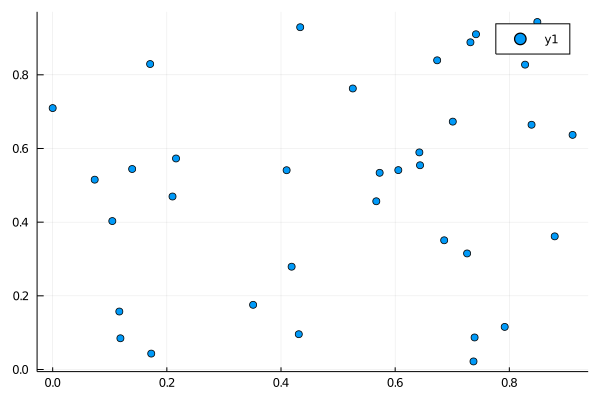

In [53]:
scatter(collect(collect(zip(edata...))[1]),collect(collect(zip(edata...))[2]))

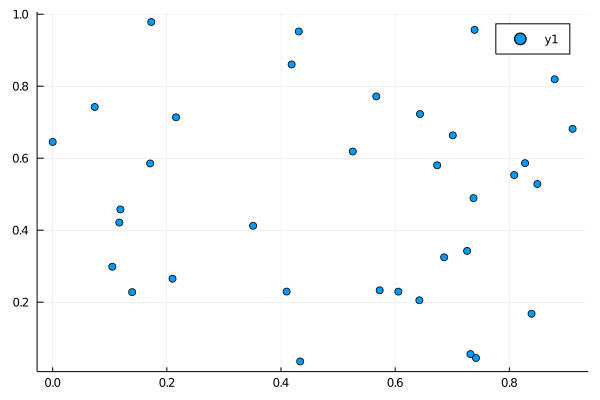

In [54]:
scatter(collect(collect(zip(edata...))[1]),collect(collect(zip(edata...))[3]))

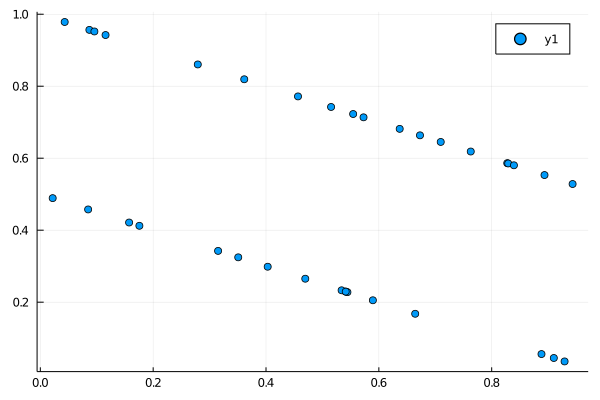

In [55]:
scatter(collect(collect(zip(edata...))[2]),collect(collect(zip(edata...))[3]))

In [56]:
[b + 2*c for (a,b,c) in edata]

36-element Array{Float64,1}:
 2.0
 2.0
 2.0
 2.0
 2.0
 2.0
 2.0
 1.0
 1.0
 1.0
 1.0
 1.0
 2.0
 ⋮
 1.0
 1.0
 2.0
 2.0
 2.0
 2.0
 1.0
 1.0
 1.0
 2.0
 1.0
 2.0

In [57]:
edata = equidistdata(2*x^4- 5, pbound=1000, a=3, badp=[ZZ(2), ZZ(3), ZZ(17)], mod = 3, val =2)

using P = (2, 3)


83-element Array{Any,1}:
 (0.08695652173913043, 0.043478260869565216, 0.8695652173913043)
 (0.5517241379310345, 0.1724137931034483, 0.3793103448275862)
 (0.36585365853658536, 0.4146341463414634, 0.4634146341463415)
 (0.1276595744680851, 0.8085106382978723, 0.8297872340425532)
 (0.5471698113207547, 0.0, 0.8113207547169812)
 (0.4067796610169492, 0.13559322033898305, 0.5423728813559322)
 (0.5070422535211268, 0.0, 0.07042253521126761)
 (0.4819277108433735, 0.3132530120481928, 0.3493975903614458)
 (0.0449438202247191, 0.4044943820224719, 0.7303370786516854)
 (0.6435643564356436, 0.594059405940594, 0.0297029702970297)
 (0.08411214953271028, 0.5981308411214953, 0.34579439252336447)
 (0.35398230088495575, 0.34513274336283184, 0.5132743362831859)
 (0.8473282442748091, 0.3893129770992366, 0.5648854961832062)
 ⋮
 (0.6452742123687282, 0.7829638273045507, 0.3290548424737456)
 (0.7636152954808807, 0.22711471610660486, 0.6743916570104287)
 (0.5073779795686719, 0.34846765039727584, 0.28944381384790013)
 (0.6933483652762119, 0.7779030439684329, 0.7970687711386697)
 (0.5367727771679474, 0.5060373216245884, 0.8968166849615807)
 (0.6458557588805167, 0.02691065662002153, 0.02906350914962325)
 (0.7321997874601488, 0.8852284803400637, 0.6716259298618491)
 (0.18690601900739176, 0.47940865892291445, 0.9609292502639916)
 (0.9433368310598111, 0.09024134312696747, 0.6264428121720882)
 (0.768280123583934, 0.490216271884655, 0.8372811534500515)
 (0.5301944728761515, 0.14943705220061412, 0.759467758444217)
 (0.3672431332655137, 0.9847405900305188, 0.0762970498474059)

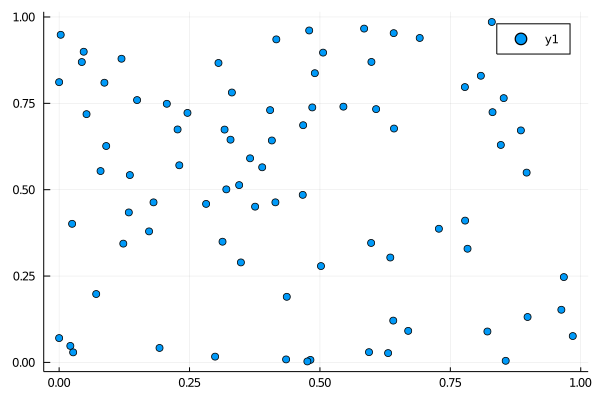

In [58]:
scatter(collect(collect(zip(edata...))[2]),collect(collect(zip(edata...))[3]))

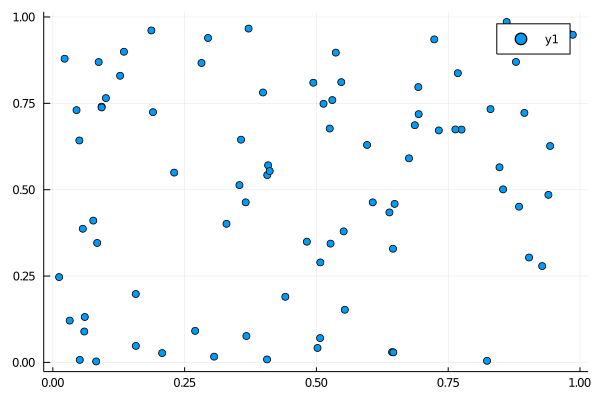

In [59]:
scatter(collect(collect(zip(edata...))[1]),collect(collect(zip(edata...))[3]))

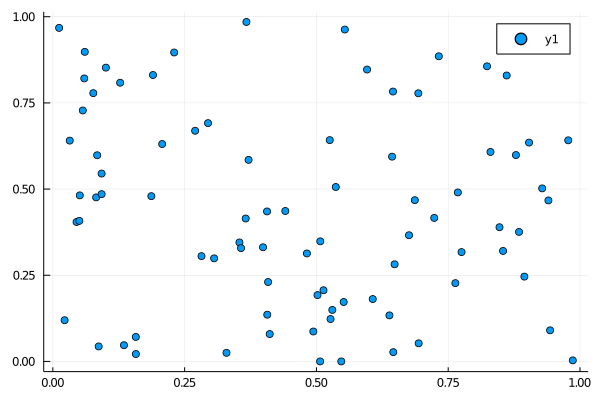

In [60]:
scatter(collect(collect(zip(edata...))[1]),collect(collect(zip(edata...))[2]))

In [61]:
sqrt(2)*a + b

UndefVarError: [91mUndefVarError: a not defined[39m

In [108]:
?PrimesSet

search: PrimesSet PrimeIdealsSet coprime_base_insert



```
PrimesSet(f::Integer, t::Integer) -> PrimesSet
PrimesSet(f::fmpz, t::fmpz) -> PrimesSet
```

Returns an iterable object $S$ representing the prime numbers $p$ for $f \le p \le t$. If $t=-1$, then the upper bound is infinite.

---

```
PrimesSet(f::Integer, t::Integer, mod::Integer, val::Integer)  
PrimesSet(f::fmpz, t::fmpz, mod::fmpz, val::fmpz)
```

Returns an iterable object $S$ representing the prime numbers $p$ for $f \le p \le t$ and $p\equiv val \bmod mod$ (primes in arithmetic progression).    If $t=-1$, then the upper bound is infinite.


$$ J = Jac(C)$$
$a \in O_K \acts J$ 
$$ O_K \to (J \to J)$$
$$\int_{n D} \omega =  \int_{a_* D} \omega = \int_{D} a^* \omega  = \int_D \underbrace{a \cdot \omega}_{\in H^0 (X/K, \Omega^1)}$$

In [ ]:

$$ A \omega_1 + B \omega_2$$

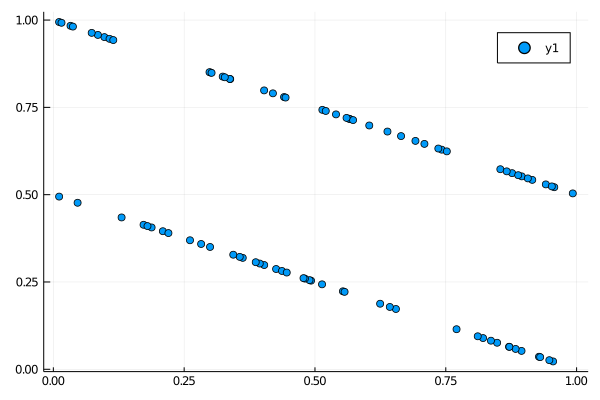

In [16]:

scatter(collect(collect(zip(edata2080...))[1]),collect(collect(zip(edata2080...))[2]))